In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from collections import Counter


questions: 
1. In what neighborhood is the mean total time spent the highest and lowest? What plot can be used to best represent these values?
2.Resample the data by week, in each week of the month, which category of call was most frequent on average? Does a specific neighborhood receive more of one category than another?
3.Does having a higher priority affect total response time? Is there any relationship between priority and zip code? Map zip codes and frequency of calls in the last month. Is there any pattern?
4.
5.


In [3]:
df=pd.read_csv('Detroit-911_Calls_for_Service_(Last_30_Days).csv')
df



,X,Y,incident_id,agency,incident_address,zip_code,priority,callcode,calldescription,category,...,traveltime,totalresponsetime,time_on_scene,totaltime,neighborhood,block_id,council_district,longitude,latitude,ObjectId
0,-83.108512,42.373040,202236400038,DPD,Linwood St & Clairmount St,48206,3,SA,SPECIAL ATTENTION,SPCL ATT,...,0.0,0.0,4.6,4.6,North LaSalle,2.616353e+14,5.0,-83.108512,42.373040,1
1,-83.160790,42.425981,202236400039,DPD,Pickford St & Wyoming St,48221,3,935030,REMARKS,REMARKS,...,17.8,84.2,126.6,210.8,Bagley,2.616354e+14,2.0,-83.160790,42.425981,2
2,-83.066505,42.339483,202236400040,DPD,S M 10 Service Drive & Grand River Ave,48201,5,376050,INVESTIGATE AUTO,INVAUTO,...,0.0,0.0,46.4,46.4,Midtown,2.616352e+14,6.0,-83.066505,42.339483,3
3,-83.088657,42.425048,202236400042,DPD,Hull St & E Nevada St,48203,3,W4807,START OF SHIFT INFORMATION,STRTSHFT,...,0.0,0.0,0.7,0.8,Cadillac Heights,2.616351e+14,3.0,-83.088657,42.425048,4
4,-82.993417,42.407280,202236400043,DPD,E Outer Dr & Gunston Ave,48213,3,W8190,TOWING DETAIL,TOW,...,0.0,0.0,NaN,NaN,Eden Gardens,2.616350e+14,4.0,-82.993417,42.407280,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75659,-83.203448,42.414069,202302803607,DPD,Prevost St & Grove St,48235,2,TS,TRAFFIC STOP,TRF STOP,...,0.0,0.0,2.4,2.4,Crary/St Marys,2.616354e+14,1.0,-83.203448,42.414069,75660
75660,-82.965558,42.437207,202302803614,DPD,Hayes St & Lappin St,48205,3,825030,DISTURBANCE,DISTURB,...,NaN,NaN,NaN,NaN,Regent Park,2.616350e+14,3.0,-82.965558,42.437207,75661
75661,-83.130877,42.389751,202302803620,DPD,W Davison St & Dexter Ave,48238,3,SA,SPECIAL ATTENTION,SPCL ATT,...,0.0,0.0,1.6,1.6,Dexter-Linwood,2.616353e+14,2.0,-83.130877,42.389751,75662
75662,-83.187776,42.401858,202302803623,DPD,Strathmoor St & Fenkell St,48227,2,TS,TRAFFIC STOP,TRF STOP,...,0.0,0.0,2.7,2.7,Bethune Community,2.616354e+14,1.0,-83.187776,42.401858,75663


In [4]:
#1: In what neighborhood is the mean total time spent the highest and lowest? What plot can be used to best represent these values?
total_time=df.groupby('neighborhood')['totaltime'].mean().sort_values(ascending=True)
highest=total_time.idxmax()
lowest=total_time.idxmin()
total_time
print(highest, "neighborhood has the highest total time spent and ",lowest,'neighborhood has the lowest total time spent')

Joseph Berry Sub neighborhood has the highest total time spent and  Douglass neighborhood has the lowest total time spent


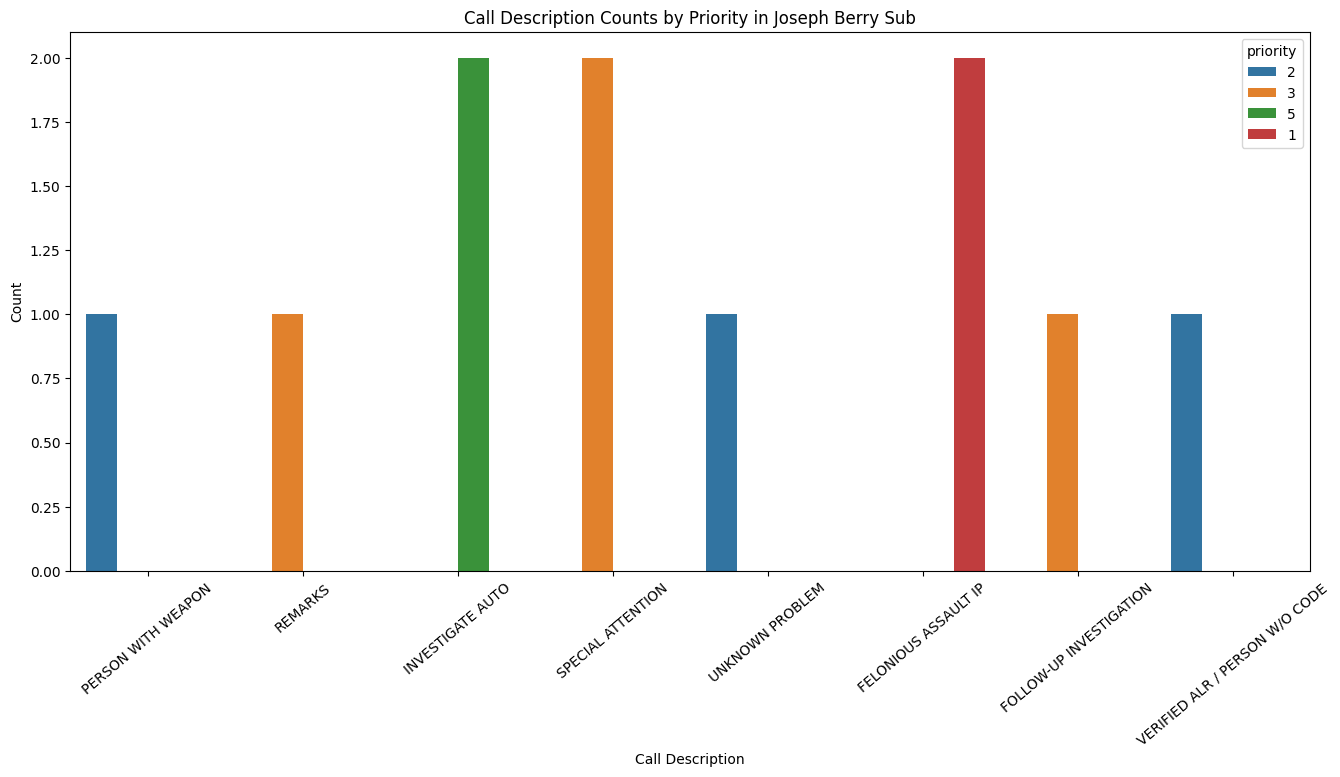

In [48]:
#plot
plt.figure(figsize=(16, 7))
highest_df=df[df.neighborhood==highest]

sns.countplot(data=highest_df, x='calldescription', hue='priority')

# Set title and axis labels
plt.title('Call Description Counts by Priority in Joseph Berry Sub')
plt.xlabel('Call Description')
plt.xticks(rotation=40)
plt.ylabel('Count')

plt.show()


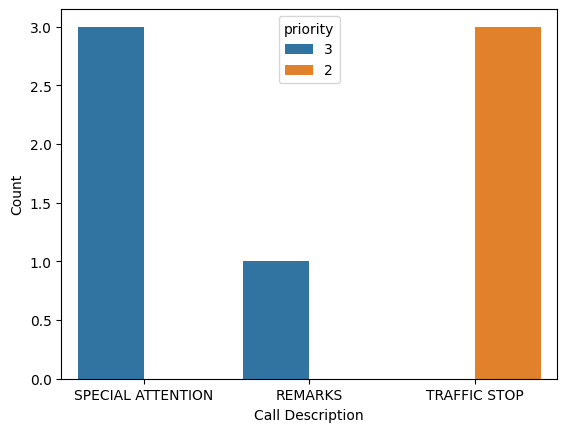

In [6]:


lowest_df=df[df.neighborhood==lowest]
sns.countplot(data=lowest_df, x='calldescription', hue='priority')

# Set title and axis labels
#plt.title('Call Description Counts by Priority')
plt.xlabel('Call Description')
plt.ylabel('Count')

plt.show()

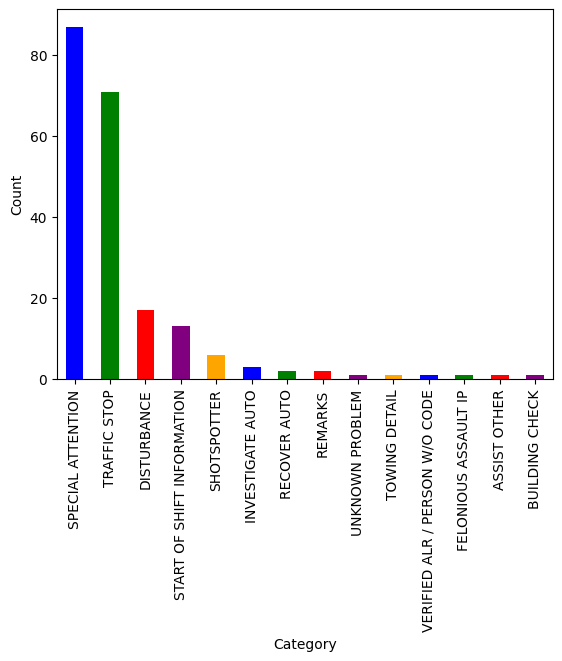

In [7]:
#2
import matplotlib.pyplot as plt

neighborhood_calls = df.groupby(['neighborhood', 'calldescription']).size().unstack(fill_value=0)

most_common_categories = neighborhood_calls.idxmax(axis=1)
#most_common_categories
colors = ['blue', 'green', 'red', 'purple', 'orange']

category_counts = most_common_categories.value_counts()
category_counts.plot(kind='bar', color=colors)


#plt.title('Distribution of Maximum Category Counts across Neighborhoods')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.ylabel('Count')


plt.show()



Text(0.5, 1.0, 'Frequency of 911 calls by hour of day')

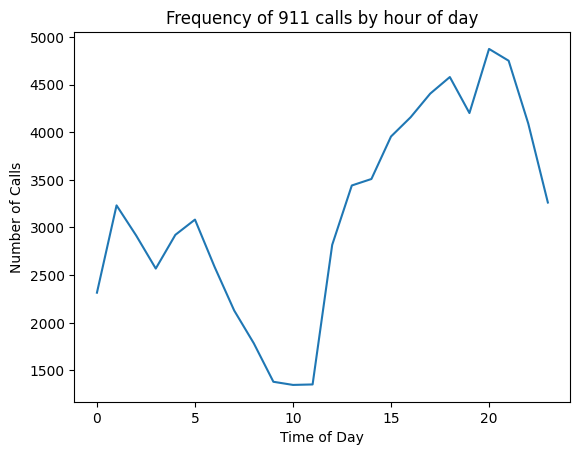

In [50]:
#2


df['call_timestamp']=df.call_timestamp.apply(pd.to_datetime)
df['hour'] = df['call_timestamp'].dt.hour
df['day_of_week'] = df['call_timestamp'].dt.day_of_week



hourly_counts = df.groupby('hour')['call_timestamp'].count()

# plot as a line plot
fig, ax = plt.subplots()
ax.plot(hourly_counts.index, hourly_counts.values)





ax.set_xlabel('Time of Day')
ax.set_ylabel('Number of Calls')
ax.set_title('Frequency of 911 calls by hour of day')

#plt.show()




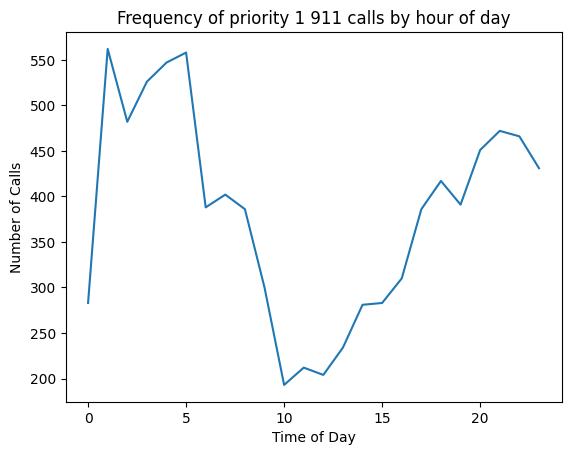

In [9]:

df_p1 = df[df['priority'] == '1']



p1_counts = df_p1.groupby('hour')['call_timestamp'].count()

fig, ax = plt.subplots()
ax.plot(p1_counts.index, p1_counts.values)





ax.set_xlabel('Time of Day')
ax.set_ylabel('Number of Calls')
ax.set_title('Frequency of priority 1 911 calls by hour of day')

plt.show()

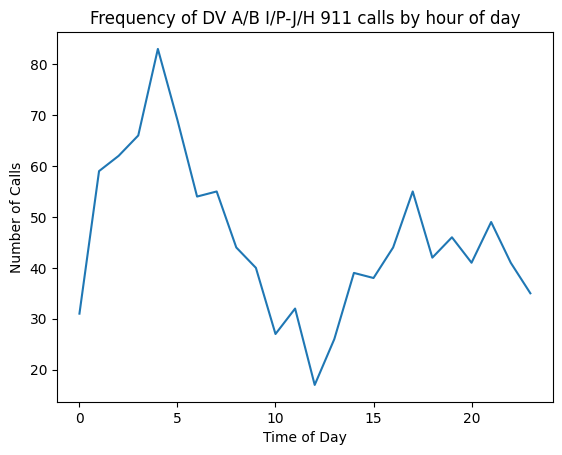

In [10]:
x=df_p1.groupby('calldescription').count()
x.idxmax()

#this tells us that the majority of priority 1 calls are described as "DV A/B I/P-J/H"

#let's plot this description to see what time of day these calls come in 

max_p1=df[df.calldescription=='DV A/B I/P-J/H']

max_p1_counts = max_p1.groupby('hour')['call_timestamp'].count()

fig, ax = plt.subplots()
ax.plot(max_p1_counts.index, max_p1_counts.values)





ax.set_xlabel('Time of Day')
ax.set_ylabel('Number of Calls')
ax.set_title('Frequency of DV A/B I/P-J/H 911 calls by hour of day')

plt.show()


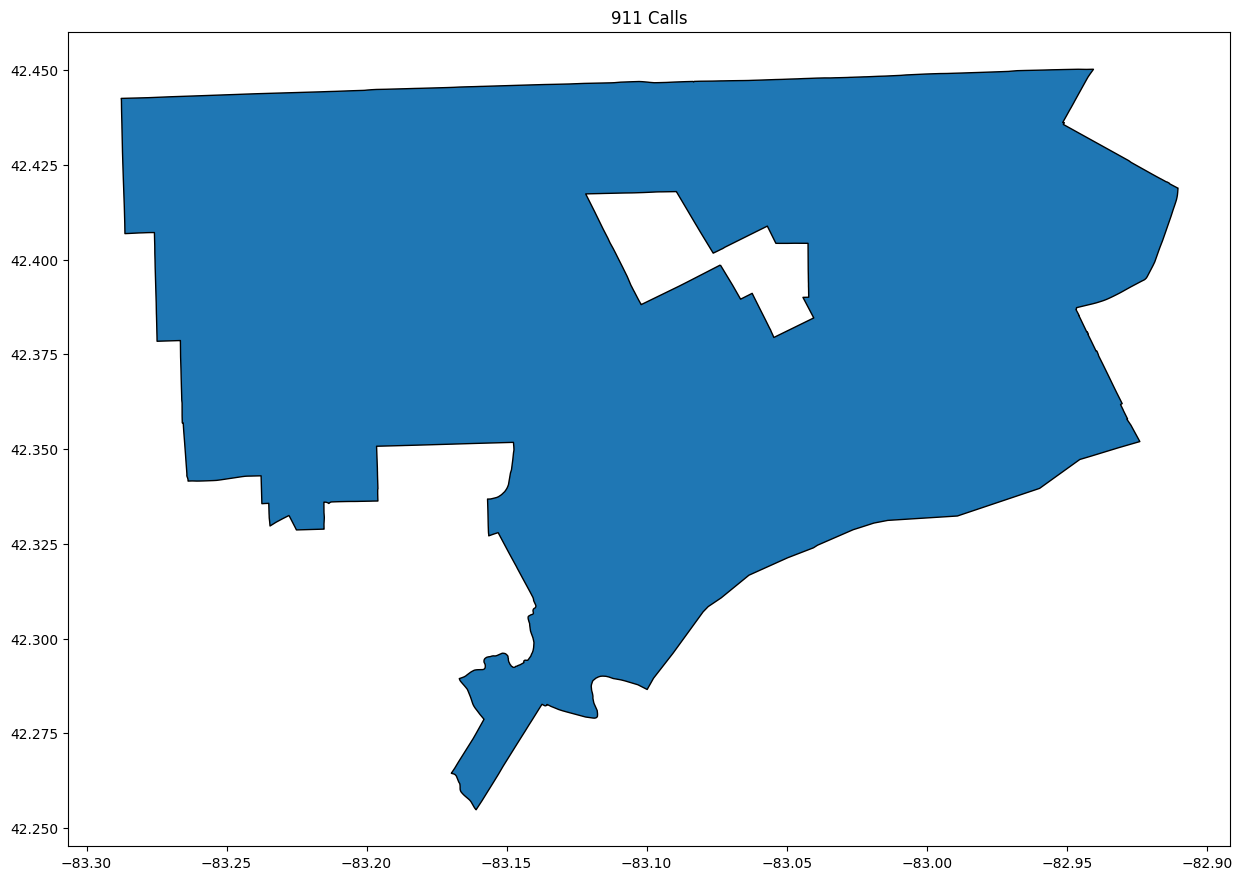

In [11]:
#City_of_Detroit_Boundary.shp


import geopandas as gpd
from shapely.geometry import Point

# Create a GeoDataFrame from the DataFrame containing the 911 calls data
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Load a map of the area using a shapefile
map_df = gpd.read_file('City_of_Detroit_Boundary/City_of_Detroit_Boundary.shp')

# Plot the map and overlay the 911 calls data points
ax = map_df.plot(figsize=(15, 15), alpha=1, edgecolor='black')
#gdf.plot(ax=ax, color='red', markersize=1)

# Set the title and show the plot
ax.set_title('911 Calls')
plt.show()

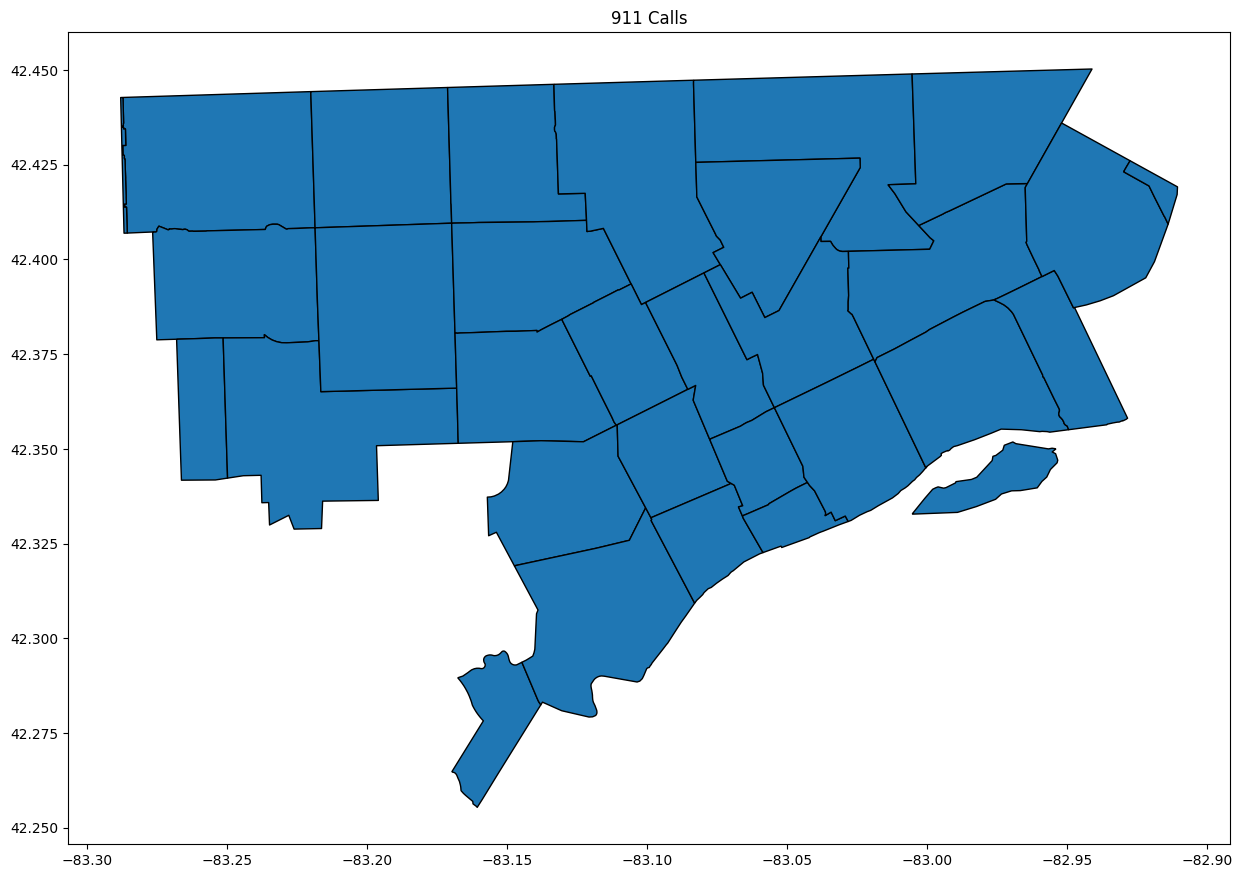

In [12]:
#City_of_Detroit_Zip_Codes
#City_of_Detroit_Zip_Codes/zip_codes.shp

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Load a map of the area using a shapefile
map_df = gpd.read_file('City_of_Detroit_Zip_Codes/zip_codes.shp')

# Plot the map and overlay the 911 calls data points
ax = map_df.plot(figsize=(15, 15), alpha=1, edgecolor='black')
#gdf.plot(ax=ax, color='red', markersize=1)


# Set the x-axis and y-axis limits to the extent of the GeoDataFrame
#ax.set_xlim(gdf.total_bounds[0], gdf.total_bounds[2])
#ax.set_ylim(gdf.total_bounds[1], gdf.total_bounds[3])
# Set the title and show the plot
ax.set_title('911 Calls')
plt.show()


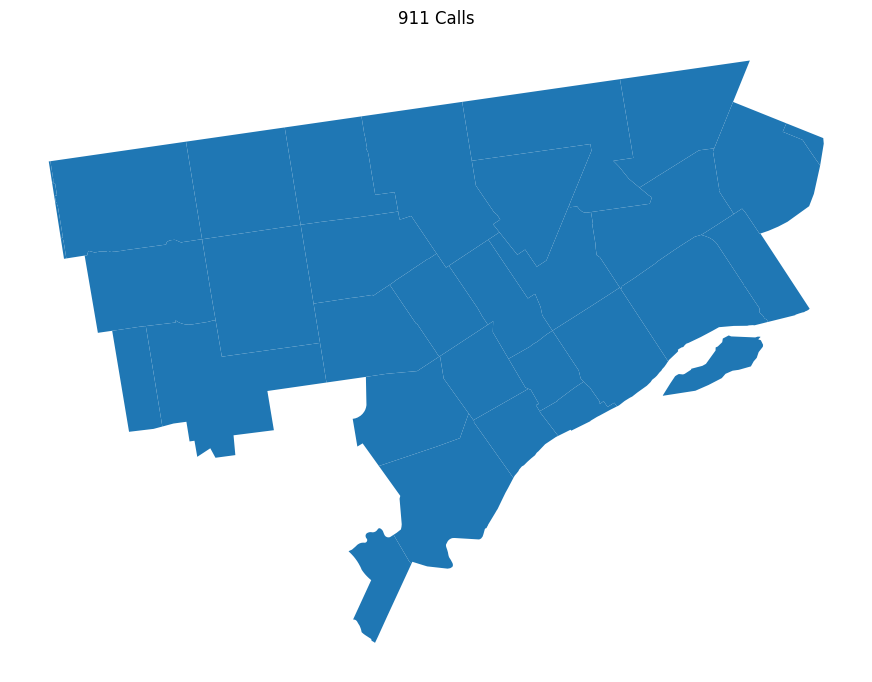

In [13]:
city_map = gpd.read_file('City_of_Detroit_Zip_Codes/zip_codes.shp')


projection = "+proj=laea +lat_0=30 +lon_0=-95"
city_map = city_map.to_crs(projection)

fig, ax = plt.subplots(1, figsize=(11,8.5))
ax.axis('off')
city_map.plot(ax=ax)






#df.plot(x='longitude', y='latitude', kind='scatter', color='red', s=1, ax=ax)

ax.set_title('911 Calls')
plt.show()


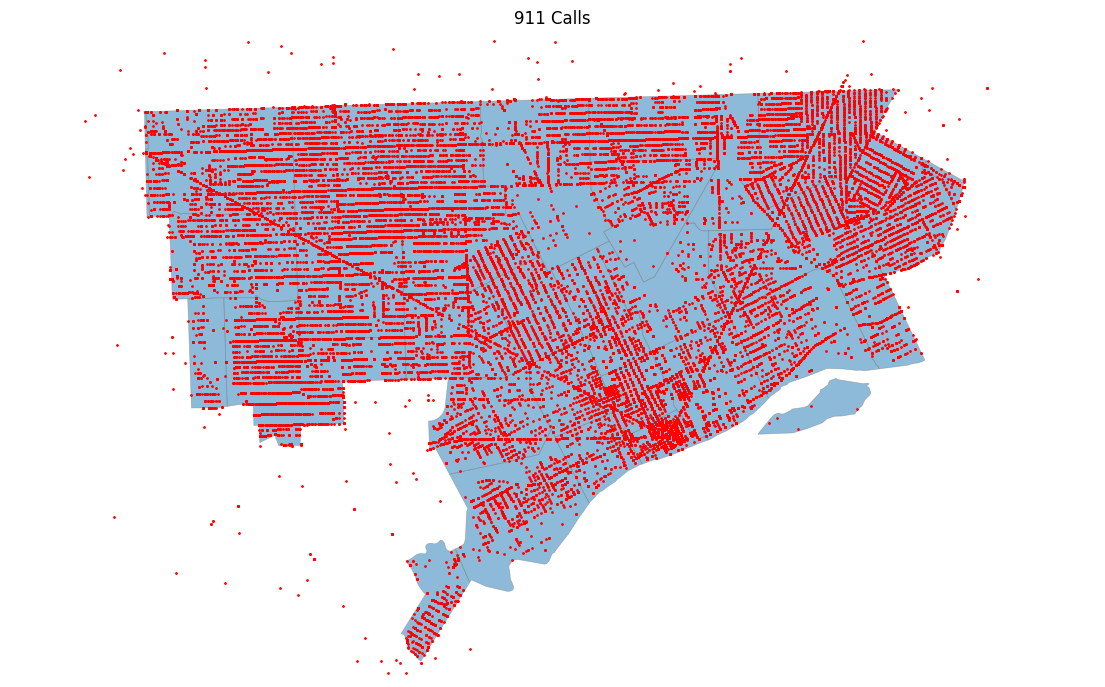

In [14]:
city_map = gpd.read_file('City_of_Detroit_Zip_Codes/zip_codes.shp')

# Convert the latitudes and longitudes in the DataFrame to the same CRS as the city_map data
df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']), crs="EPSG:4326")
df = df.to_crs(city_map.crs)

# Create the plot
fig, ax = plt.subplots(figsize=(14,10))
ax.set_title('911 Calls')
ax.set_facecolor('lightblue') # Set the background color
ax.set_xlim([-83.35, -82.85]) # Set the x-axis limits to focus on Detroit
ax.set_ylim([42.25, 42.47]) # Set the y-axis limits to focus on Detroit
ax.axis('off')
city_map.plot(ax=ax, alpha=0.5, edgecolor='gray', linewidth=0.5)
df.plot(ax=ax, markersize=1, color='red')

plt.show()



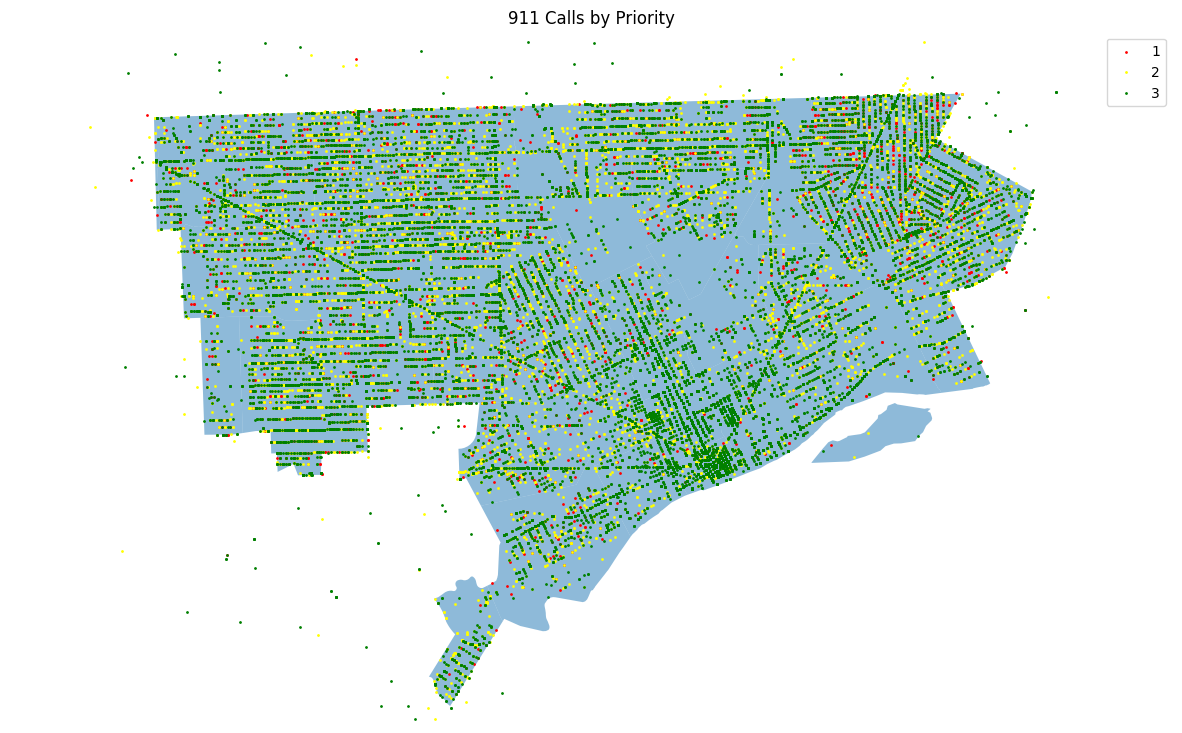

In [15]:
#4 what do you notice when spatially plotting the calls by priority?  Is there any relationship between priority and zip code?



city_map = gpd.read_file('City_of_Detroit_Zip_Codes/zip_codes.shp')


df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']), crs="EPSG:4326")
df = df.to_crs(city_map.crs)


fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('911 Calls by Priority')
ax.axis('off')
city_map.plot(ax=ax, alpha=0.5)
ax.set_xlim([-83.35, -82.85]) # Set x-axis limits to focus on Detroit
ax.set_ylim([42.25, 42.47])

priority_colors = {'1': 'red', '2': 'yellow', '3': 'green'}
for priority, color in priority_colors.items():
    df[df['priority'] == priority].plot(ax=ax, markersize=1, color=color, label=priority)


plt.legend(loc='upper right')

plt.show()

<Axes: title={'center': 'Shotspotter calls by neighborhood'}>

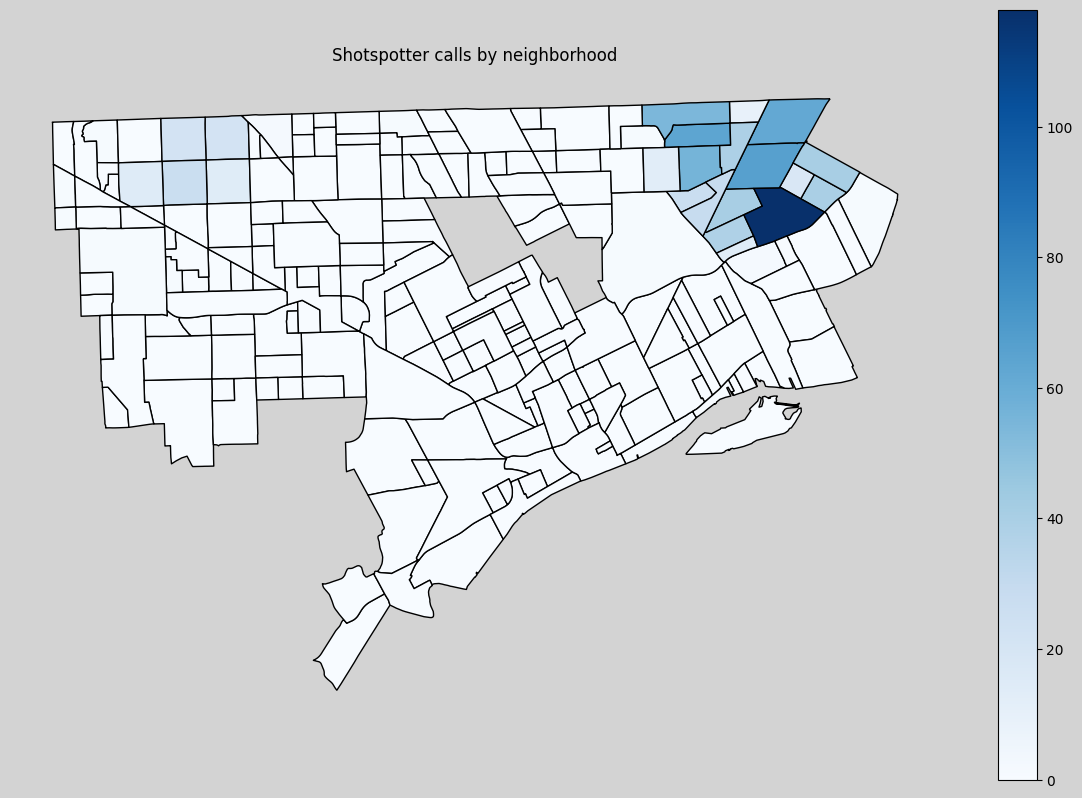

In [16]:
#one of the call descriptions is shotspotter- a controversial technology installed in several neighborhoods in detroit to sense the audio frequency of a gunshot
#and automatically alert the police. let's plot shotspotter calls from the last month onto a map of neighborhoods in detroit. are they clustered in 
#specific areas?

from collections import Counter

# filter the dataframe for SHOTSPOTTER calls
df_shot = df[(df.calldescription == 'SHOTSPOTTER' )]

# count the number of SHOTSPOTTER calls by neighborhood
neighborhood_counts = Counter(df_shot.neighborhood)

# create a GeoDataFrame with neighborhood boundaries
n_map = gpd.read_file('Current_City_of_Detroit_Neighborhoods/Neighborhoods.shp')

# merge the neighborhood counts with the GeoDataFrame
#n_map = n_map.merge(pd.DataFrame.from_dict(neighborhood_counts, orient='index', columns=['count']), left_on='nhood_name',right_index=True)


n_map = n_map.merge(pd.DataFrame.from_dict(neighborhood_counts, orient='index', columns=['count']), how='left', left_on='nhood_name', right_index=True)
n_map['count'] = n_map['count'].fillna(0)
# plot the counts by neighborhood
fig, ax = plt.subplots(figsize=(15, 10),facecolor='lightgray')
ax.set_title('Shotspotter calls by neighborhood')
ax.axis('off')
n_map.plot(column='count', cmap='Blues', edgecolor='black',legend=True, ax=ax)


#ax.set_xlim([-83.35, -82.85]) # Set x-axis limits to focus on Detroit
#ax.set_ylim([42.25, 42.47])




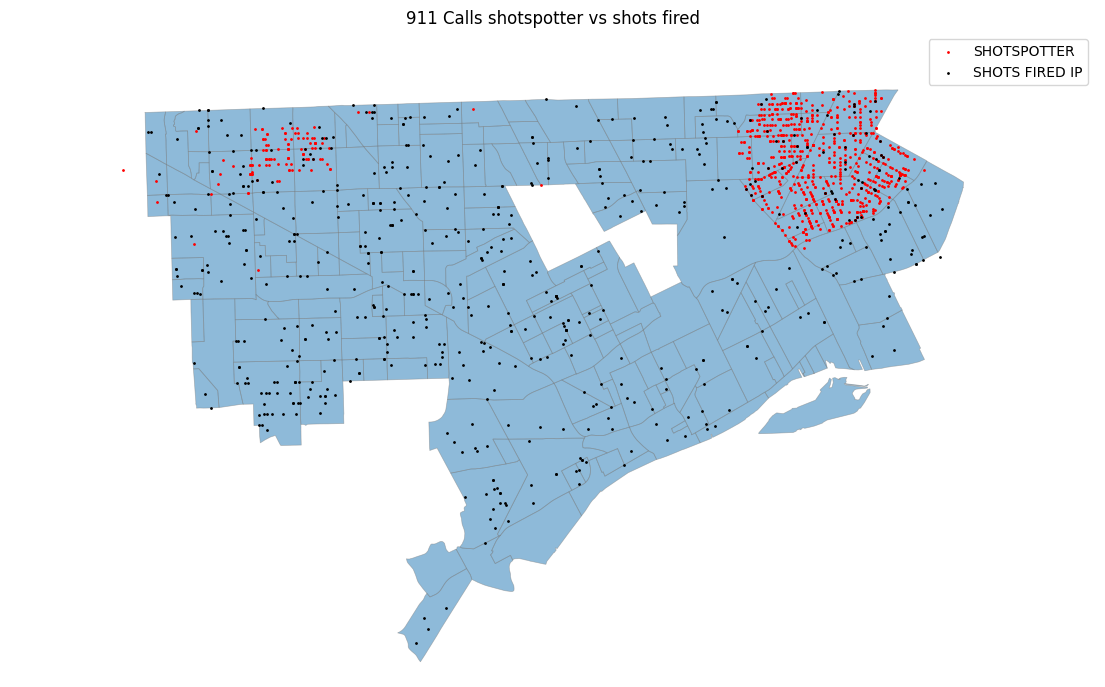

In [17]:
#5 shotspotter is a device that automatically alerts the police. what can we learn by showing where shotspotter calls come from vs regular shots fired?



df_shot2 = df[(df.calldescription == 'SHOTSPOTTER') | (df.calldescription == 'SHOTS FIRED IP')]

n_map = gpd.read_file('Current_City_of_Detroit_Neighborhoods/Neighborhoods.shp')

# Convert the latitudes and longitudes in the DataFrame to the same CRS as the city_map data
#dfs= gpd.GeoDataFrame(df_shot2, geometry=gpd.points_from_xy(df_shot2['longitude'], df_shot2['latitude']), crs="EPSG:4326")
#dfs = df_shot2.to_crs(n_map.crs)

#dfs= gpd.GeoDataFrame(df_shot2, geometry=gpd.points_from_xy(df_shot2['longitude'], df_shot2['latitude']))
#dfs = df_shot2.to_crs(n_map.crs)

# Create the plot
fig, ax = plt.subplots(figsize=(14,10))
ax.set_title('911 Calls shotspotter vs shots fired')
ax.set_facecolor('lightblue') # Set the background color
ax.set_xlim([-83.35, -82.85]) # Set the x-axis limits to focus on Detroit
ax.set_ylim([42.25, 42.47]) # Set the y-axis limits to focus on Detroit
ax.axis('off')
n_map.plot(ax=ax, alpha=0.5, edgecolor='gray', linewidth=0.5)
#dfs.plot(ax=ax, markersize=1, color='red')
colors = {'SHOTSPOTTER': 'red', 'SHOTS FIRED IP': 'black'}
for cat, color in colors.items():
    df_shot2 [df_shot2 ['calldescription'] == cat].plot(ax=ax, markersize=1, color=color, label=cat)


plt.legend(loc='upper right')


plt.show()


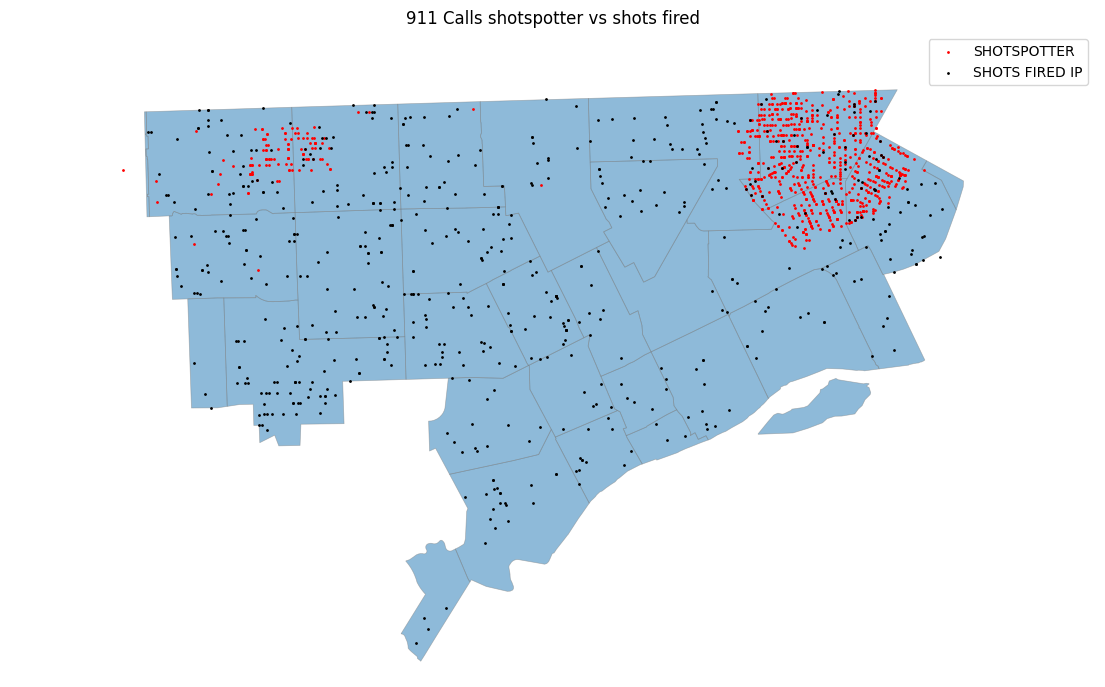

In [18]:
df_shot2 = df[(df.calldescription == 'SHOTSPOTTER') | (df.calldescription == 'SHOTS FIRED IP')]



# Convert the latitudes and longitudes in the DataFrame to the same CRS as the city_map data
#dfs= gpd.GeoDataFrame(df_shot2, geometry=gpd.points_from_xy(df_shot2['longitude'], df_shot2['latitude']), crs="EPSG:4326")
#dfs = df_shot2.to_crs(n_map.crs)

#dfs= gpd.GeoDataFrame(df_shot2, geometry=gpd.points_from_xy(df_shot2['longitude'], df_shot2['latitude']))
#dfs = df_shot2.to_crs(n_map.crs)

# Create the plot
fig, ax = plt.subplots(figsize=(14,10))
ax.set_title('911 Calls shotspotter vs shots fired')
ax.set_facecolor('lightblue') # Set the background color
ax.set_xlim([-83.35, -82.85]) # Set the x-axis limits to focus on Detroit
ax.set_ylim([42.25, 42.47]) # Set the y-axis limits to focus on Detroit
ax.axis('off')
city_map.plot(ax=ax, alpha=0.5, edgecolor='gray', linewidth=0.5)
#dfs.plot(ax=ax, markersize=1, color='red')
colors = {'SHOTSPOTTER': 'red', 'SHOTS FIRED IP': 'black'}
for cat, color in colors.items():
    df_shot2 [df_shot2 ['calldescription'] == cat].plot(ax=ax, markersize=1, color=color, label=cat)


plt.legend(loc='upper right')


plt.show()

In [19]:
df[(df.calldescription == 'SHOTS FIRED IP')].time_on_scene.mean()/df[(df.calldescription == 'SHOTSPOTTER')].time_on_scene.mean()




1.4672888789218947

In [68]:
df_shot.officerinitiated.value_counts()
# shotspotter officer initiated 9.9 percent 77/776
#shots fired officer initiated 3%
18/599
#df_shots_f=df[df.calldescription=='SHOTS FIRED IP']

#df_shots_f.officerinitiated.value_counts()

0.03005008347245409

In [69]:
df.columns

Index(['X', 'Y', 'incident_id', 'agency', 'incident_address', 'zip_code',
       'priority', 'callcode', 'calldescription', 'category', 'call_timestamp',
       'precinct_sca', 'respondingunit', 'officerinitiated', 'intaketime',
       'dispatchtime', 'traveltime', 'totalresponsetime', 'time_on_scene',
       'totaltime', 'neighborhood', 'block_id', 'council_district',
       'longitude', 'latitude', 'ObjectId', 'hour', 'day_of_week', 'geometry'],
      dtype='object')

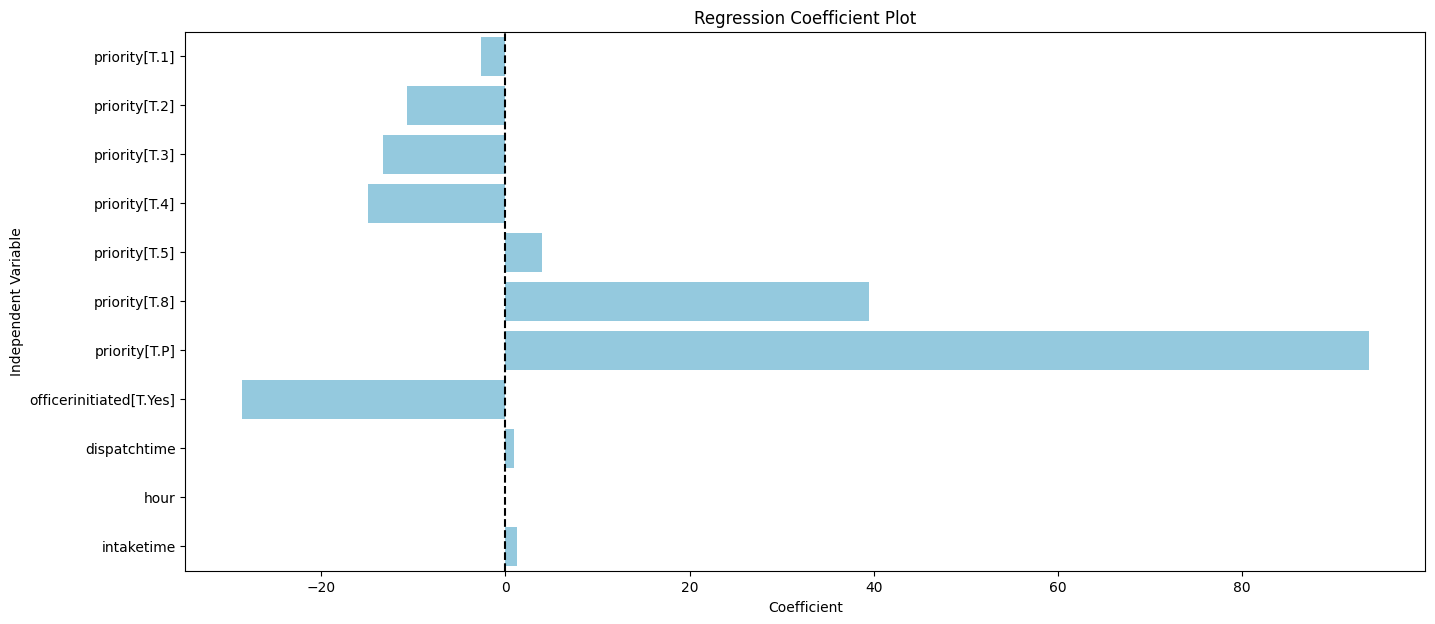

In [83]:

model = smf.ols('totaltime ~ dispatchtime + priority + hour + intaketime + officerinitiated', data=df).fit()

import seaborn as sns

# Extract the coefficients and their p-values from the model
coef_df = pd.DataFrame({'coef': model.params.values, 'pval': model.pvalues.values}, index=model.params.index)

# Filter out the intercept coefficient
coef_df = coef_df.drop('Intercept')

# Create the coefficient plot
plt.figure(figsize=(16, 7))
sns.barplot(x='coef', y=coef_df.index, data=coef_df, color='skyblue', orient='h')
plt.axvline(x=0, color='black', linestyle='--')
plt.title('Regression Coefficient Plot')
plt.xlabel('Coefficient')
plt.ylabel('Independent Variable')
plt.show()


In [88]:
def officer(row):
    if row=='Yes':
        return 1
    else:
        return 0



df['officerinitiated_bin']=df.officerinitiated.apply(officer)

In [103]:
#model = smf.logit('officerinitiated_bin ~ dispatchtime + priority + hour + intaketime + category', data=df).fit()
#model.summary()


# I guess you can't perform a logistical regression here??


In [101]:
hotspot=df.groupby('neighborhood').count().idxmax()[0]

def hot(row):
    if row==hotspot:
        return 1
    else:
        return 0
df['hotspot']=df.neighborhood.apply(hot)

In [107]:
model = smf.logit('hotspot ~ totaltime + priority + hour + intaketime + officerinitiated', data=df).fit()

model.summary()

         Current function value: 0.200505
         Iterations: 35


/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                hotspot   No. Observations:                72829
Model:                          Logit   Df Residuals:                    72817
Method:                           MLE   Df Model:                           11
Date:                Thu, 20 Apr 2023   Pseudo R-squ.:                 0.04153
Time:                        00:53:44   Log-Likelihood:                -14603.
converged:                      False   LL-Null:                       -15235.
Covariance Type:            nonrobust   LLR p-value:                1.250e-264
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -18.1231   2521.703     -0.007      0.994   -4960.570    4924.324
priority[T.1]              14.2096   2521.703      0.006      0.996   -4928.237    4956.656
priority[T.2]              14.3853   2521.703      0.006      0.995   -4928.061    4956.832
priority[T.3]              15.1455   2521.703      0.006      0.995   -4927.301    4957.592
priority[T.4]              14.4929   2521.703      0.006      0.995   -4927.954    4956.940
priority[T.5]              13.9272   2521.703      0.006      0.996   -4928.519    4956.374
priority[T.8]               1.9214   4851.779      0.000      1.000   -9507.390    9511.233
priority[T.P]              15.6501   2521.703      0.006      0.995   -4926.797    4958.097
officerinitiated[T.Yes]     0.7096      0.068     10.497      0.000       0.577       0.842
totaltime                  -0.0033      0.001     -5.624      0.000      -0.004      -0.002
hour                       -0.0077      0.002     -3.219      0.001      -0.012      -0.003
intaketime                  0.0035      0.019      0.185      0.853      -0.034       0.041
===========================================================================================
"""

In [22]:
df.groupby('calldescription').count().sort_values(by='X',ascending=False)

,X,Y,incident_id,agency,incident_address,zip_code,priority,callcode,category,call_timestamp,...,totaltime,neighborhood,block_id,council_district,longitude,latitude,ObjectId,hour,day_of_week,geometry
calldescription,,,,,,,,,,,,,,,,,,,,,
SPECIAL ATTENTION,16007,16007,16007,16007,15588,16007,16007,16007,16007,16007,...,15967,15481,15588,15486,16007,16007,16007,16007,16007,16007
TRAFFIC STOP,9956,9956,9956,9956,9461,9956,9956,9956,9956,9956,...,9914,9301,9461,9300,9956,9956,9956,9956,9956,9956
START OF SHIFT INFORMATION,7131,7131,7131,7131,7078,7131,7131,7131,7131,7131,...,7103,7072,7078,7072,7131,7131,7131,7131,7131,7131
DISTURBANCE,4910,4910,4910,4910,4904,4910,4910,4910,4910,4910,...,4432,4831,4904,4858,4910,4910,4910,4910,4910,4910
REMARKS,3950,3950,3950,3950,3817,3950,3950,3950,3950,3950,...,3901,3772,3817,3777,3950,3950,3950,3950,3950,3950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EXTORTION IP,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
TRANSPORT PRISONER-OTH AGT,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
HPPD BURG ALRM,1,1,1,1,0,1,1,1,1,1,...,1,0,0,0,1,1,1,1,1,1


In [37]:
greenlight

,address,business_n,business_t,precinct,live_date,ObjectId,address_id,geometry
0,2847 E 7 Mile Rd,Global Mobile,Retail,11,2016-12-01,1,NaN,POINT (-83.07466 42.43349)
1,3701 Joy Rd,Grand Liquor,Retail,10,2017-05-31,2,NaN,POINT (-83.11799 42.36985)
2,8671 Rosa Parks Blvd,Virginia Park Community Investment Association,NaN,10,2018-12-04,3,NaN,POINT (-83.09764 42.37278)
3,10786 Grand River Ave,U & I 12,Retail,2,2019-01-18,4,NaN,POINT (-83.15022 42.37359)
4,7501 E Jefferson Ave,Sheridan Place I,Residential,7,2019-08-12,5,NaN,POINT (-82.99925 42.34945)
...,...,...,...,...,...,...,...,...
824,13226 W McNichols Rd,Sloppy Chops,Retail,12,2020-02-11,825,67639,POINT (-83.17613 42.41685)
825,300 W McNichols Rd,New Light Recovery Center,Services,12,2018-10-24,826,347880,POINT (-83.10734 42.41794)
826,951 Whitmore Rd,951 Whitmore,Residential,12,2021-08-30,827,279574,POINT (-83.11619 42.42023)
827,400 E Congress St,Sweetwater Tavern,Retail,3,2019-12-20,828,3532,POINT (-83.04179 42.33170)


In [38]:
df

,X,Y,incident_id,agency,incident_address,zip_code,priority,callcode,calldescription,category,...,totaltime,neighborhood,block_id,council_district,longitude,latitude,ObjectId,hour,day_of_week,geometry
0,-83.108512,42.373040,202236400038,DPD,Linwood St & Clairmount St,48206,3,SA,SPECIAL ATTENTION,SPCL ATT,...,4.6,North LaSalle,2.616353e+14,5.0,-83.108512,42.373040,1,5,4,POINT (-83.10851 42.37304)
1,-83.160790,42.425981,202236400039,DPD,Pickford St & Wyoming St,48221,3,935030,REMARKS,REMARKS,...,210.8,Bagley,2.616354e+14,2.0,-83.160790,42.425981,2,5,4,POINT (-83.16079 42.42598)
2,-83.066505,42.339483,202236400040,DPD,S M 10 Service Drive & Grand River Ave,48201,5,376050,INVESTIGATE AUTO,INVAUTO,...,46.4,Midtown,2.616352e+14,6.0,-83.066505,42.339483,3,5,4,POINT (-83.06651 42.33948)
3,-83.088657,42.425048,202236400042,DPD,Hull St & E Nevada St,48203,3,W4807,START OF SHIFT INFORMATION,STRTSHFT,...,0.8,Cadillac Heights,2.616351e+14,3.0,-83.088657,42.425048,4,5,4,POINT (-83.08866 42.42505)
4,-82.993417,42.407280,202236400043,DPD,E Outer Dr & Gunston Ave,48213,3,W8190,TOWING DETAIL,TOW,...,NaN,Eden Gardens,2.616350e+14,4.0,-82.993417,42.407280,5,5,4,POINT (-82.99342 42.40728)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75659,-83.203448,42.414069,202302803607,DPD,Prevost St & Grove St,48235,2,TS,TRAFFIC STOP,TRF STOP,...,2.4,Crary/St Marys,2.616354e+14,1.0,-83.203448,42.414069,75660,0,6,POINT (-83.20345 42.41407)
75660,-82.965558,42.437207,202302803614,DPD,Hayes St & Lappin St,48205,3,825030,DISTURBANCE,DISTURB,...,NaN,Regent Park,2.616350e+14,3.0,-82.965558,42.437207,75661,0,6,POINT (-82.96556 42.43721)
75661,-83.130877,42.389751,202302803620,DPD,W Davison St & Dexter Ave,48238,3,SA,SPECIAL ATTENTION,SPCL ATT,...,1.6,Dexter-Linwood,2.616353e+14,2.0,-83.130877,42.389751,75662,0,6,POINT (-83.13088 42.38975)
75662,-83.187776,42.401858,202302803623,DPD,Strathmoor St & Fenkell St,48227,2,TS,TRAFFIC STOP,TRF STOP,...,2.7,Bethune Community,2.616354e+14,1.0,-83.187776,42.401858,75663,0,6,POINT (-83.18778 42.40186)


In [36]:

import geopandas as gpd

# Load the shapefile into a geopandas GeoDataFrame
greenlight= gpd.read_file('project_greenlight/project_greenlight.shp')

# Make sure the CRS of the neighborhoods GeoDataFrame matches the CRS of the 911 calls data
greenlight = greenlight.to_crs(crs=df.crs)
# Perform a spatial join between the neighborhoods GeoDataFrame and the 911 calls GeoDataFrame
merged = gpd.sjoin(df, greenlight, how='left', op='within')

merged

/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,X,Y,incident_id,agency,incident_address,zip_code,priority,callcode,calldescription,category,...,day_of_week,geometry,index_right,address,business_n,business_t,precinct,live_date,ObjectId_right,address_id
0,-83.108512,42.373040,202236400038,DPD,Linwood St & Clairmount St,48206,3,SA,SPECIAL ATTENTION,SPCL ATT,...,4,POINT (-83.10851 42.37304),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-83.160790,42.425981,202236400039,DPD,Pickford St & Wyoming St,48221,3,935030,REMARKS,REMARKS,...,4,POINT (-83.16079 42.42598),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-83.066505,42.339483,202236400040,DPD,S M 10 Service Drive & Grand River Ave,48201,5,376050,INVESTIGATE AUTO,INVAUTO,...,4,POINT (-83.06651 42.33948),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-83.088657,42.425048,202236400042,DPD,Hull St & E Nevada St,48203,3,W4807,START OF SHIFT INFORMATION,STRTSHFT,...,4,POINT (-83.08866 42.42505),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-82.993417,42.407280,202236400043,DPD,E Outer Dr & Gunston Ave,48213,3,W8190,TOWING DETAIL,TOW,...,4,POINT (-82.99342 42.40728),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75659,-83.203448,42.414069,202302803607,DPD,Prevost St & Grove St,48235,2,TS,TRAFFIC STOP,TRF STOP,...,6,POINT (-83.20345 42.41407),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75660,-82.965558,42.437207,202302803614,DPD,Hayes St & Lappin St,48205,3,825030,DISTURBANCE,DISTURB,...,6,POINT (-82.96556 42.43721),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75661,-83.130877,42.389751,202302803620,DPD,W Davison St & Dexter Ave,48238,3,SA,SPECIAL ATTENTION,SPCL ATT,...,6,POINT (-83.13088 42.38975),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75662,-83.187776,42.401858,202302803623,DPD,Strathmoor St & Fenkell St,48227,2,TS,TRAFFIC STOP,TRF STOP,...,6,POINT (-83.18778 42.40186),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
import seaborn as sns

# Calculate the number of emergency incidents in each project greenlight area
greenlight_counts = merged.groupby('business_n')['incident_id'].count()
greenlight_counts

,business_n,incident_id


In [ ]:
greenlight_counts.columns = ['business_n', 'incident_count']

# Merge the greenlight area counts back into the greenlight GeoDataFrame
greenlight_merge = greenlight.merge(greenlight_counts, on='business_n')

# Create a cluster map of the incident counts
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=greenlight_merge, x='longitude', y='latitude', hue='incident_count', legend=False, s=100)
ax.set_title('Emergency Incidents by Project Greenlight Area')
plt.show()

In [40]:
merged.columns


Index(['X', 'Y', 'incident_id', 'agency', 'incident_address', 'zip_code',
       'priority', 'callcode', 'calldescription', 'category', 'call_timestamp',
       'precinct_sca', 'respondingunit', 'officerinitiated', 'intaketime',
       'dispatchtime', 'traveltime', 'totalresponsetime', 'time_on_scene',
       'totaltime', 'neighborhood', 'block_id', 'council_district',
       'longitude', 'latitude', 'ObjectId_left', 'hour', 'day_of_week',
       'geometry', 'index_right', 'address', 'business_n', 'business_t',
       'precinct', 'live_date', 'ObjectId_right', 'address_id'],
      dtype='object')